In [56]:
import scipy as sp, numpy as np
from scipy import stats
import pandas as pd;
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt

## Importing Data

In [105]:
X = pd.read_csv('/Users/zoekim/Desktop/phosphorylation-data.csv', header=0) #300 x 12
Y = pd.read_csv('/Users/zoekim/Desktop/Ydata.csv', header=0) 

X = np.array(X)
peptide_phosphosite = X[:,0]
protein_description = X[:,1]
PC9 = X[:,2]
Erl = X[:,3]
R428 = X[:,4]
Erl_R428 = X[:,5]
Erl_HGF = X[:,6]
Erl_FGF = X[:,7]
Erl_IGF = X[:,8]
KO_Erl = X[:,9]
KO_R428 = X[:,10]
KO_Erl_R428 = X[:,11]

Y = np.array(Y)
Y_axl = Y[:,3]
#for now- redo CSV later
Y_axl = Y_axl[:10]

X_axl = np.concatenate([PC9,Erl,R428,Erl_R428,Erl_HGF,Erl_FGF,Erl_IGF,KO_Erl,KO_R428,KO_Erl_R428])
X_axl = np.reshape(X_axl,(10,300))

X_v = np.concatenate([PC9,Erl,R428,Erl_HGF,Erl_FGF,Erl_IGF])
X_v = np.reshape(X_v,(6,300))

Y_v = Y[:,2]
# temp
del_v = np.arange(7,36)
Y_v = np.delete(Y_v,[del_v])
Y_v = np.delete(Y_v,3)

(6, 300) (6,)


## Preprocessing Data

In [112]:
# Z-score Y
Y_z_axl = sp.stats.zscore(Y_axl)
Y_z_v = sp.stats.zscore(Y_v)

# Z-score X
X_z_axl = np.empty([X_axl.shape[0], X_axl.shape[1]])
for a in range(X_axl.shape[1]):
    column = []
    column = X_axl[:,a]
    column_mean = np.mean(column)
    column_std = np.std(column)
    X_z_axl[:,a] = np.asmatrix([(column-column_mean)/column_std])
X_z_v = np.empty([X_v.shape[0], X_v.shape[1]])
for b in range(X_v.shape[1]):
    column = []
    column = X_v[:,b]
    column_mean = np.mean(column)
    column_std = np.std(column)
    X_z_v[:,b] = np.asmatrix([(column-column_mean)/column_std])

## Determining Number of Components

(10, 300) (10,)


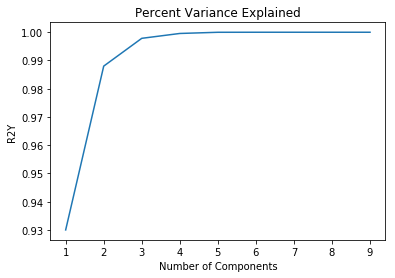

In [121]:
R2Ys = []
components = []

# Get R2Y values for PLS4 from 1-10 components
for i in range(1,10):
    plsr = PLSRegression(n_components = i)
    X_scores, Y_scores = plsr.fit_transform(X_z_axl,Y_z_axl)
    R2Y = plsr.score(X_z_axl,Y_z_axl)
    R2Ys.append(R2Y)
    components.append(i)

# Plot R2Y vs. # of Components
plt.plot(components,R2Ys)
plt.title('Percent Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('R2Y')
plt.show()

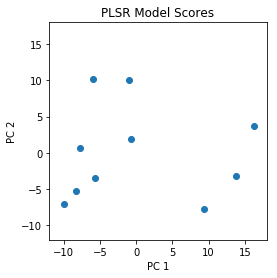

In [73]:
# 3 component regression
plsr3 = PLSRegression(n_components = 3)
X_scores_3, Y_scores_3 = plsr3.fit_transform(X_z_axl,Y_z_axl)

# First two principal components
PC1 = X_scores_3[:,0]
PC2 = X_scores_3[:,1]

# Plot
# later color based on cell type
plt.scatter(PC1,PC2)
plt.xlim(-12,18)
plt.ylim(-12,18)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PLSR Model Scores')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

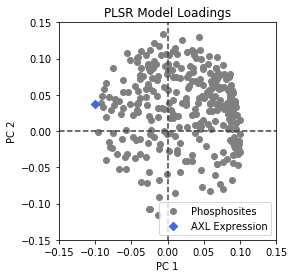

In [74]:
# Retrieving loadings
X_loadings = plsr3.x_loadings_
Y_loadings = plsr3.y_loadings_

# Loadings for first two components
PC1_xl = X_loadings[:,0]
PC2_xl = X_loadings[:,1]
PC1_yl = Y_loadings[:,0]
PC2_yl = Y_loadings[:,1]

# Plot
# color based on clusters later
plt.scatter(PC1_xl, PC2_xl, color='0.5', label='Phosphosites')
plt.scatter(PC1_yl, PC2_yl, color='#4169E1', marker='D', label='AXL Expression')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PLSR Model Loadings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.axhline(y=0, color='0.25', linestyle='--')
plt.axvline(x=0, color='0.25', linestyle='--')
plt.show()

(6, 300) (6,)


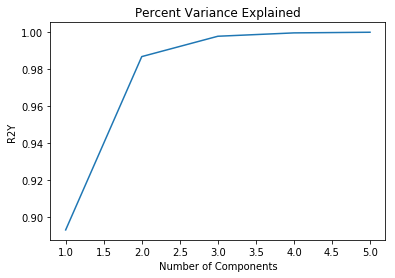

In [122]:
R2Ys_v = []
components_v = []

for j in range(1,6):
    plsr_v = PLSRegression(n_components = j)
    X_scores_v, Y_scores_v = plsr_v.fit_transform(X_z_v,Y_z_v)
    R2Y_v = plsr_v.score(X_z_v,Y_z_v)
    R2Ys_v.append(R2Y_v)
    components_v.append(j)
    
plt.plot(components_v,R2Ys_v)
plt.title('Percent Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('R2Y')
plt.show()

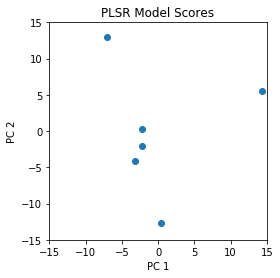

In [129]:
# 2 component regression
plsr2 = PLSRegression(n_components = 2)
X_scores_2, Y_scores_2 = plsr2.fit_transform(X_z_v,Y_z_v)

# First two principal components
PC1v = X_scores_2[:,0]
PC2v = X_scores_2[:,1]

# Plot
# later color based on cell type
plt.scatter(PC1v,PC2v)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PLSR Model Scores')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

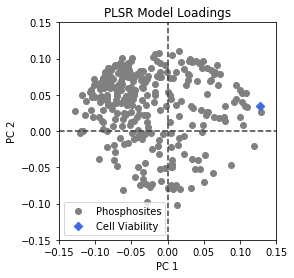

In [131]:
# Retrieving loadings
X_loadings_v = plsr2.x_loadings_
Y_loadings_v = plsr2.y_loadings_

# Loadings for first two components
PC1_xlv = X_loadings_v[:,0]
PC2_xlv = X_loadings_v[:,1]
PC1_ylv = Y_loadings_v[:,0]
PC2_ylv = Y_loadings_v[:,1]

# Plot
# color based on clusters later
plt.scatter(PC1_xlv, PC2_xlv, color='0.5', label='Phosphosites')
plt.scatter(PC1_ylv, PC2_ylv, color='#4169E1', marker='D', label='Cell Viability')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PLSR Model Loadings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.axhline(y=0, color='0.25', linestyle='--')
plt.axvline(x=0, color='0.25', linestyle='--')
plt.show()